In [1]:
import os
from huggingface_hub import login

hf_token = os.environ['HF_TOKEN']
login(hf_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
import torch
import transformers

model_id = "google/gemma-3-4b-it"
model_path = "./agricsense.model"

In [3]:
from datasets import load_dataset

DATASET_BASE = "/home/junhee0110/dataset/images_split_{}"
JSON_BASE = "NewQA_split_{}.json"
SPLIT_NUMBER = 1


get_dataset_dir = lambda index: DATASET_BASE.format(index)
get_json_dir = lambda index: os.path.join(DATASET_BASE.format(index), JSON_BASE.format(index))

dataset = load_dataset("json", data_files=get_json_dir(SPLIT_NUMBER), split="train")

get_image_path = lambda index, is_depth: os.path.join(get_dataset_dir(SPLIT_NUMBER), dataset[index]["image"][is_depth])

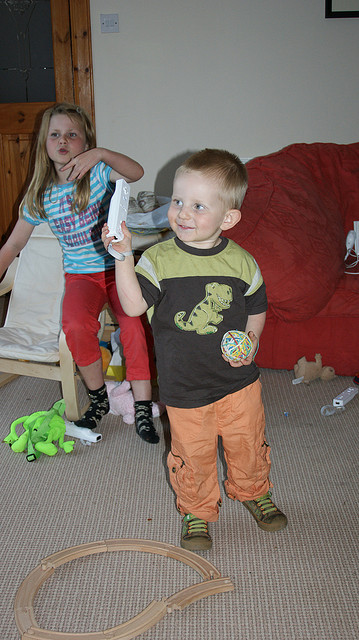

In [4]:
from PIL import Image

Image.open(get_image_path(9845, 0))

In [5]:
from transformers import AutoProcessor, AutoModelForImageTextToText

model = AutoModelForImageTextToText.from_pretrained(
    model_path,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2"
)

processor = AutoProcessor.from_pretrained(model_path)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/junhee0110/.agricsense/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:550: UserWarning: Model with `tie_word_embeddings=True` and the tied_target_modules=['language_model.lm_head'] are part of the adapter. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. See for example https://github.com/huggingface/peft/issues/2018.
  warnings.warn(


In [ ]:
from pipeline import generate_prompt, generate, generate_prompt_with_context

prompt = [
    generate_prompt("Who is the closest person?", get_image_path(9845,0), get_image_path(9845,1)),
    generate_prompt("Describe the image", get_image_path(9845,0), get_image_path(9845,1)),
    generate_prompt("who is the furhest person?", get_image_path(9845,0), get_image_path(9845,1)),
    generate_prompt("Did two people touch?", get_image_path(9845,0), get_image_path(9845,1)),
]

generated = generate(prompt, model, processor, max_new_tokens=500)